In [28]:
#! pip install plotly==5.4.0
#! pip install cufflinks
#! pip install textblob

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sn
sn.set_theme(color_codes=True)
import matplotlib.pyplot as plt
import os
import datetime
import pickle
import nltk
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
import statistics
import statsmodels.api as sm
import pylab as py
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
import nltk
import re
from gensim.models import word2vec
from sklearn.manifold import TSNE

py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('training_set.csv')
df.head(2)

label                                    cleaned_article  num_punctuations  \
0      1  seeking best woman final return fridaysunday y...               139   
1      0  harsh reality come taking responsibility life ...               112   

   no_of_stopwords  no_of_quesMarks  no_of_exclamation  no_of_sentence  \
0              634                5                  0              41   
1              702                2                  3              37   

  sentiment  cc_cd  determiner  ...  noun  adverb  verb  article_len  \
0  Positive     37          98  ...   236      27   150         4563   
1  Positive     53          79  ...   196      85   230         5470   

   negations  polarity  word_count  avg_word_len  num_unique_words  num_chars  
0          6  0.049887         357      6.392157               234       2638  
1         15  0.029320         347      6.573487               263       2627  

[2 rows x 24 columns]

In [31]:
df.columns

Index(['label', 'cleaned_article', 'num_punctuations', 'no_of_stopwords',
       'no_of_quesMarks', 'no_of_exclamation', 'no_of_sentence', 'sentiment',
       'cc_cd', 'determiner', 'foreign_w', 'conj_prep', 'adjective', 'modal',
       'noun', 'adverb', 'verb', 'article_len', 'negations', 'polarity',
       'word_count', 'avg_word_len', 'num_unique_words', 'num_chars'],
      dtype='object')

<AxesSubplot:>

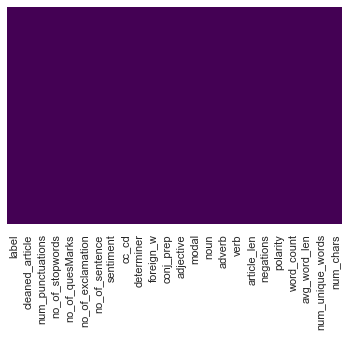

In [32]:
# Creating heatmap for null value
sn.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Inference:
    From the above plot we can infer that there is no missing value in the dataset.

In [33]:
word_count = []
for value in df['cleaned_article']:
    word_count.extend(value.split())

print("Total Number of words : ",len(word_count))
unique_words = set(word_count)
print("Total Number of unique words : ",len(unique_words))

Total Number of words :  23407159
Total Number of unique words :  292578


0    48628
1    47889
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

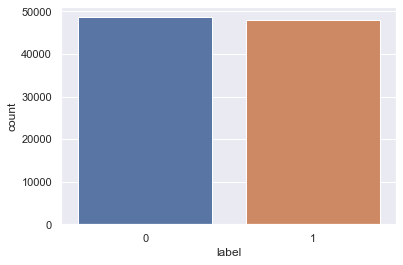

In [34]:
print(df.label.value_counts())

#plt.figure(figsize = (10,4))
sn.countplot(x = 'label',data=df)

### Inference :
    From the above count plot we can infer that our dataset is balanced.

# Univariate Analysis

## word count

In [35]:
df[df['word_count'] == 0]  # Checking articles with zero length

Empty DataFrame
Columns: [label, cleaned_article, num_punctuations, no_of_stopwords, no_of_quesMarks, no_of_exclamation, no_of_sentence, sentiment, cc_cd, determiner, foreign_w, conj_prep, adjective, modal, noun, adverb, verb, article_len, negations, polarity, word_count, avg_word_len, num_unique_words, num_chars]
Index: []

[0 rows x 24 columns]

<AxesSubplot:xlabel='word_count', ylabel='Density'>

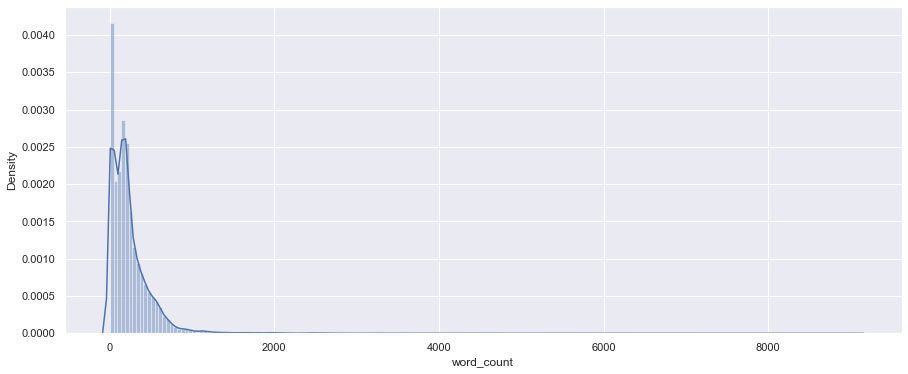

In [36]:
plt.figure(figsize = (15,6))
sn.distplot(df['word_count'], hist = True, kde = True, bins=200)
#sn.distplot(df['no_of_sentence'], hist = True, kde = True)
#sn.distplot(df['article_len'], hist = True, kde = True)

### Inference:
    Large number of articles have word length less than 500
    And there are very few articles whose word length is too large i.e. greater than 900-1000
    Many of articles have very less number of words i.e., 25

In [37]:
df['word_count'].describe()

count    96517.000000
mean       242.518510
std        289.426437
min          1.000000
25%         74.000000
50%        179.000000
75%        316.000000
max       9073.000000
Name: word_count, dtype: float64

### Inference: 
Minimum word length of the article present in training set is 1 and maximum is 9000+
Approx 75% of articles have length less than 315 words. The difference between 75% and max is so high

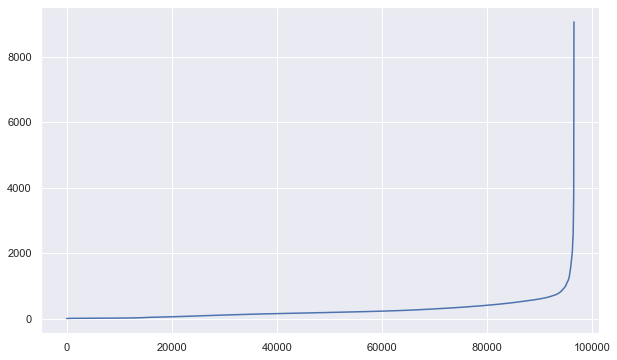

In [38]:
plt.figure(figsize = (10,6))
plt.plot(sorted(df['word_count']))

### Inference:
Above graph provides evidence that there is very less number of article who have word length more than 800-900

In [39]:
## 75-100 percentile
for i in range(75,101,5):
    #i = i/10
    print(i, 'precentile value is ',np.percentile(df['word_count'], i))

75 precentile value is  316.0
80 precentile value is  370.0
85 precentile value is  436.0
90 precentile value is  526.0
95 precentile value is  659.0
100 precentile value is  9073.0


In [40]:
## 95-100 percentile
for i in range(95,101,1):
    #i = i/10
    print(i, 'precentile value is ',np.percentile(df['word_count'], i))

95 precentile value is  659.0
96 precentile value is  706.0
97 precentile value is  778.0
98 precentile value is  924.0
99 precentile value is  1229.0
100 precentile value is  9073.0


In [41]:
## 99-100 percentile
for i in range(0,11):
    i = i/10
    print(99+i, 'precentile value is ',np.percentile(df['word_count'], 99+i))

99.0 precentile value is  1229.0
99.1 precentile value is  1305.0679999999993
99.2 precentile value is  1394.744000000006
99.3 precentile value is  1516.0
99.4 precentile value is  1629.6160000000382
99.5 precentile value is  1787.0
99.6 precentile value is  1935.872000000003
99.7 precentile value is  2093.0
99.8 precentile value is  2475.935999999987
99.9 precentile value is  3196.0
100.0 precentile value is  9073.0


### Inference
After dipping deeper into the percentile we can see till 97 percentile of articles contains word less than 800 and 99 percentile number of articles have article length less than 1220

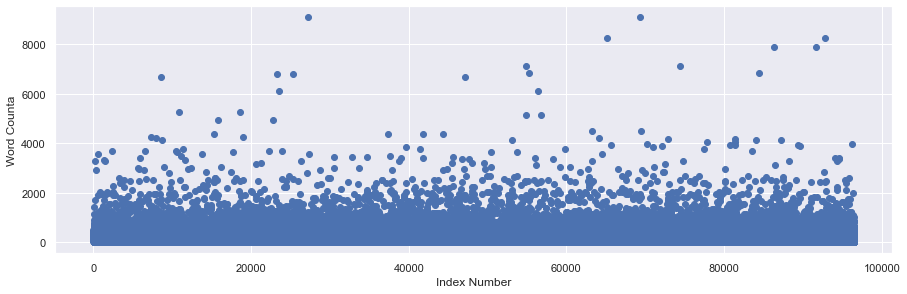

In [42]:
plt.figure(figsize = (15,10))
#plt.subplot(2,1,1)
#plt.plot(df['word_count'], np.zeros_like(df['word_count']),'*')

plt.subplot(2,1,2)
plt.scatter(df.index, df['word_count'])
plt.xlabel("Index Number")
plt.ylabel("Word Counta")
plt.show()

### Inference:
There are lots of outlier present in the data which should be removed from the training dataset.

In [43]:
len(df[df['word_count']>1000])

1580

### Inference:
There are about 1600 articles which have article word length greater than 1000. I will be considering articles having length more than 900 as outlier and I'll remove it from data set. 

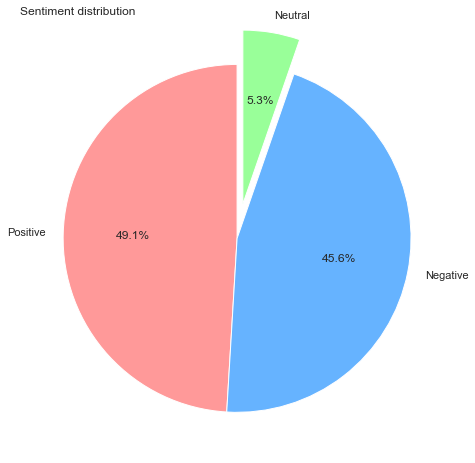

In [44]:
plt.figure(figsize=(8,8))
plt.title('Sentiment distribution', loc = 'left')
sentiment = df.sentiment.value_counts()
data = [sentiment[0], sentiment[1], sentiment[2]]
label = ['Positive', 'Negative', 'Neutral']
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0, 0, 0.2)

plt.pie(data, labels = label, colors= colors, explode = explode, autopct='%1.1f%%', startangle=90)
plt.show()

### Inference:
Most of the sentiments are either positive or negative very few are neutral. Real news are generally positive whereas Fake news are have more of negative sentiment.

# Bivariate Analysis

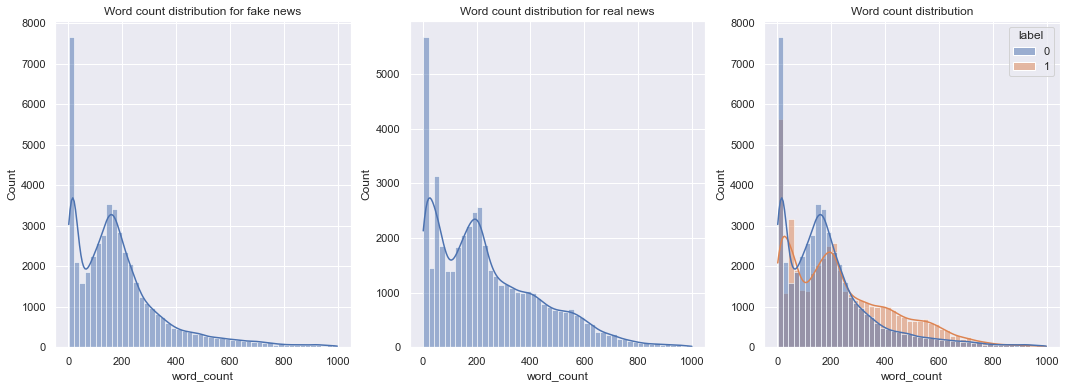

In [45]:
fig = plt.figure(figsize=(18, 6))
'''
plt.subplot(1,2,1)
counts, bin_edges = np.histogram(df_new['word_count'], bins = 20)
plt.xlabel('No of words per article')
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="PDF")
plt.plot(bin_edges[1:], cdf, label="CDF")
plt.legend()
#plt.show()
'''
plt.subplot(1,3,1)
plt.title("Word count distribution for fake news")
sn.histplot(data = df[(df['label'] == 0) & (df['word_count'] < 1000)], x = 'word_count', kde = True, bins = 50)

plt.subplot(1,3,2)
plt.title("Word count distribution for real news")
sn.histplot(data = df[(df['label'] == 1) & (df['word_count'] < 1000)], x = 'word_count', kde = True, bins = 50)

plt.subplot(1,3,3)
plt.title("Word count distribution")
sn.histplot(data = df[df['word_count'] < 1000], x = 'word_count', hue = 'label', kde = True, bins = 50)


plt.show()

In [46]:
print("Fake News")
df[df['label']==0]['word_count'].describe()

Fake News


count    48628.000000
mean       222.298758
std        310.816733
min          1.000000
25%         70.000000
50%        160.000000
75%        259.000000
max       9073.000000
Name: word_count, dtype: float64

In [47]:
print('Real News')
df[df['label']==1]['word_count'].describe()

Real News


count    47889.000000
mean       263.050283
std        264.376963
min          2.000000
25%         80.000000
50%        205.000000
75%        378.000000
max       6097.000000
Name: word_count, dtype: float64

### Inference
On an average real news contains greater number of words. We can see large number of fake news have either less number of words or very large number of words. The reason is that real number have restriction on article size whereas fake news creator have no restriction.

As article length, word count and no of sentence are related we can see same pattern in all three. 
Still it is difficult to classify data using these features as most part of distribution are overlapping

In [48]:
df.columns

Index(['label', 'cleaned_article', 'num_punctuations', 'no_of_stopwords',
       'no_of_quesMarks', 'no_of_exclamation', 'no_of_sentence', 'sentiment',
       'cc_cd', 'determiner', 'foreign_w', 'conj_prep', 'adjective', 'modal',
       'noun', 'adverb', 'verb', 'article_len', 'negations', 'polarity',
       'word_count', 'avg_word_len', 'num_unique_words', 'num_chars'],
      dtype='object')

## Statistical Features
word_count, 
no_of_sentence, 
article_len and 
avg_word_len

<AxesSubplot:xlabel='label', ylabel='avg_word_len'>

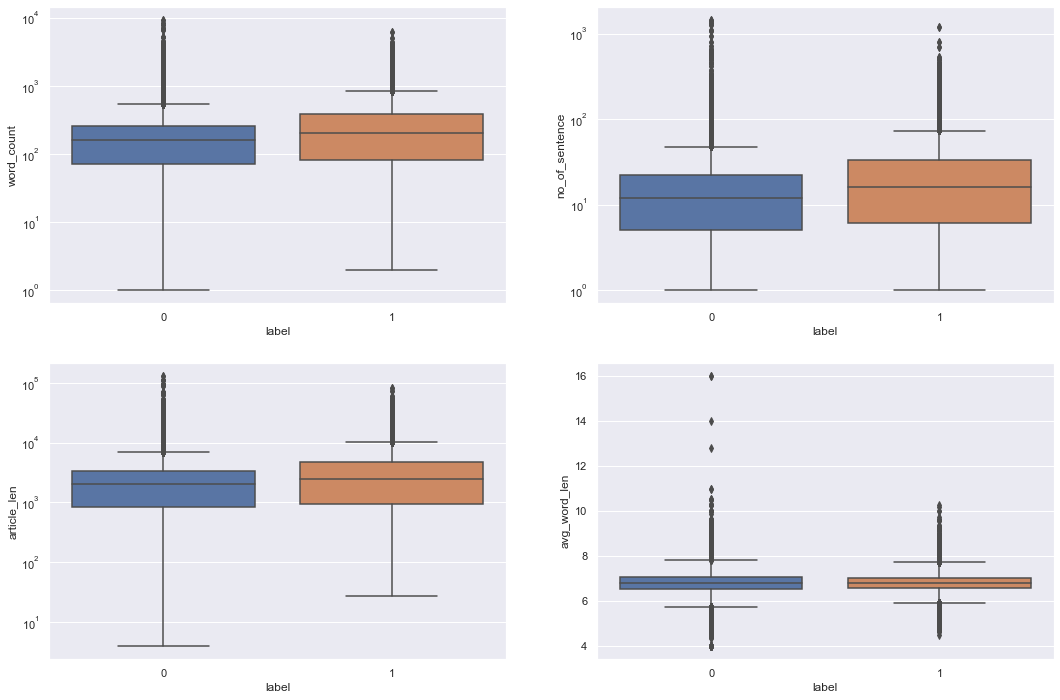

In [49]:
fig, axs  =  plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(18)
plt.ticklabel_format(axis = 'y', style = 'scientific' )
axs[0,0].set_yscale("log")
sn.boxplot(x = 'label', y = 'word_count', data = df, ax = axs[0,0])

axs[0,1].set_yscale("log")
sn.boxplot(x = 'label', y = 'no_of_sentence', data = df, ax = axs[0,1])

axs[1,0].set_yscale("log")
sn.boxplot(x = 'label', y = 'article_len', data = df, ax = axs[1,0])

axs[1,1].set_yscale('linear')
sn.boxplot(x = 'label', y = 'avg_word_len', data = df, ax = axs[1,1])

From the below box plots we can infer that the variance of all statistical feature in real news is smaller than that of fake news. However the median of real is higher than the fake news. The reason could be that the article writer or editor of real news have to follow certain set of rules which includes article length. However, fake news creators do not have as such any restriction and to potrait their news as real creators sometimes end up writing long articles.

<AxesSubplot:xlabel='label', ylabel='polarity'>

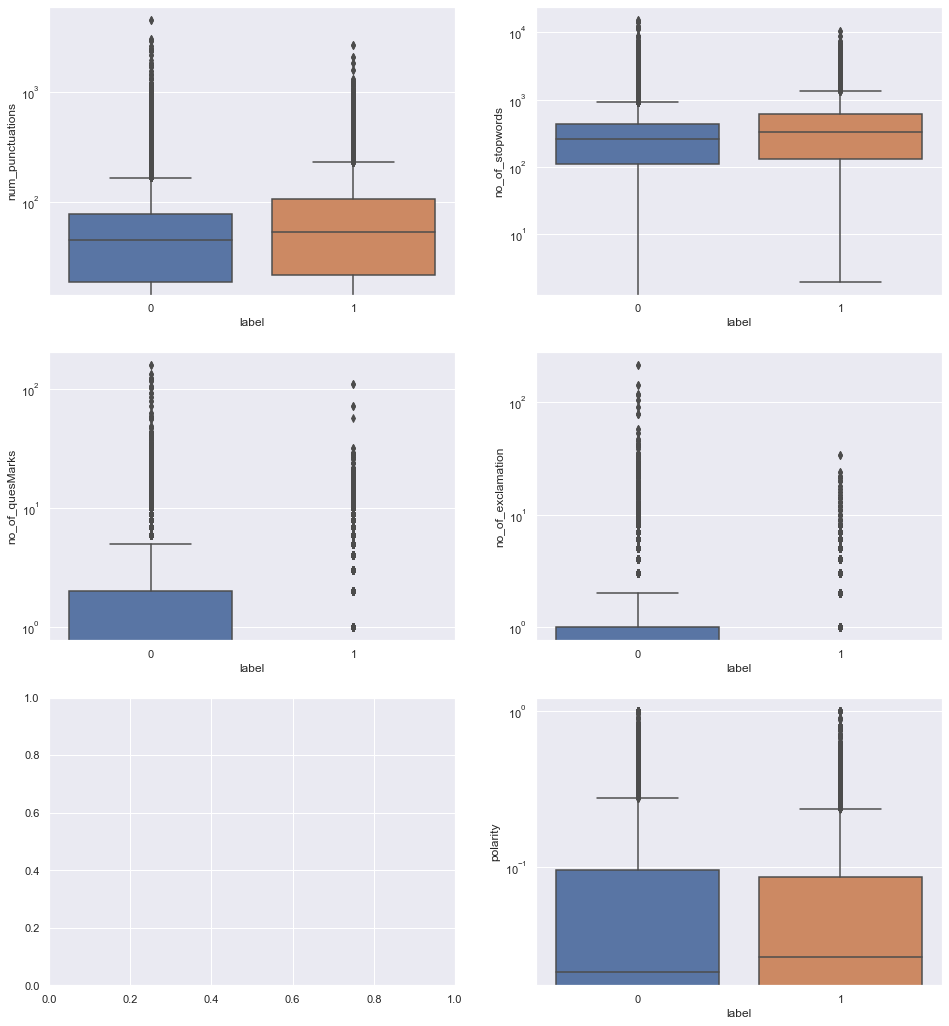

In [50]:
fig, axs  =  plt.subplots(3,2)
fig.set_figheight(18)
fig.set_figwidth(16)

axs[0,0].set_yscale("log")
sn.boxplot(x = 'label', y = 'num_punctuations', data = df, ax = axs[0,0])

axs[0,1].set_yscale("log")
sn.boxplot(x = 'label', y = 'no_of_stopwords', data = df, ax = axs[0,1])

axs[1,0].set_yscale("log")
sn.boxplot(x = 'label', y = 'no_of_quesMarks', data = df, ax = axs[1,0])

axs[1,1].set_yscale("log")
sn.boxplot(x = 'label', y = 'no_of_exclamation', data = df, ax = axs[1,1])

axs[2,1].set_yscale("log")
sn.boxplot(x = 'label', y = 'polarity', data = df, ax = axs[2,1])


# Inferences:
<b>Number of Punctuations</b> -> From the above box plot we can infer that fake news contains higher number of punctuations than real news when article length is small and large. Looking at the distribtion we can clearly understand most of the part are overlapping, this feature would not make any significant difference in modelling. There are few articles which has large number of punctuation. Mean of number of punctuation is higher in real new than fake news

<b>StopWords</b> - following same pattern as of number of punctuations. 

<b>Question and Exclamation marks</b> -> From above box plot we can understand the occurance of question mark and exclamation mark higher is fake news.

<b>No of sentence</b> -> Fake news articles generally contains less or high number of sentences whereas sentence count is moderate in real news. There are few articles which has very large number of sentences.

<AxesSubplot:xlabel='word_count', ylabel='no_of_stopwords'>

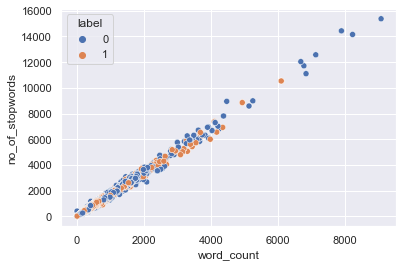

In [51]:
# Alternate
sn.scatterplot(x = 'word_count', y = 'no_of_stopwords', data = df, hue = 'label')

## c)	Cognitive Perception


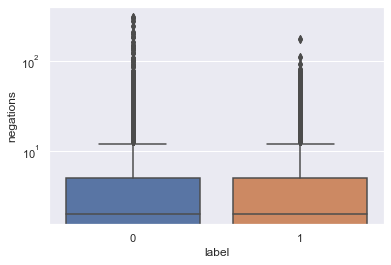

In [52]:
g = sn.boxplot(x = 'label', y = 'negations', data = df)
g.set_yscale("log")

In [53]:
print("Fake News")
df[df['label']==0]['negations'].describe()

Fake News


count    48628.000000
mean         3.826540
std          7.620807
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max        305.000000
Name: negations, dtype: float64

In [54]:
print('Real News')
df[df['label']==1]['negations'].describe()

Real News


count    47889.000000
mean         3.697801
std          5.082761
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max        171.000000
Name: negations, dtype: float64

In the above box plot we can see that the median of fake news and real now is almost equal in this case. Fake news has slightly higher number of negation words as outlier.

# POS Tagging

Most of time fake news are created to personally attack on people, group or community. We use more number of noun, adjective and preposition when we personally attack on someone. Therefore, part of speech tagging could be a distinguishing factor. Let's explore. 

In [55]:
#df1 = df.replace({0:1, 1:0})
#df1.drop(df1[(df1['label'] == 1) & (df1['noun'] > 2000)].index, inplace = True)

<AxesSubplot:xlabel='label', ylabel='foreign_w'>

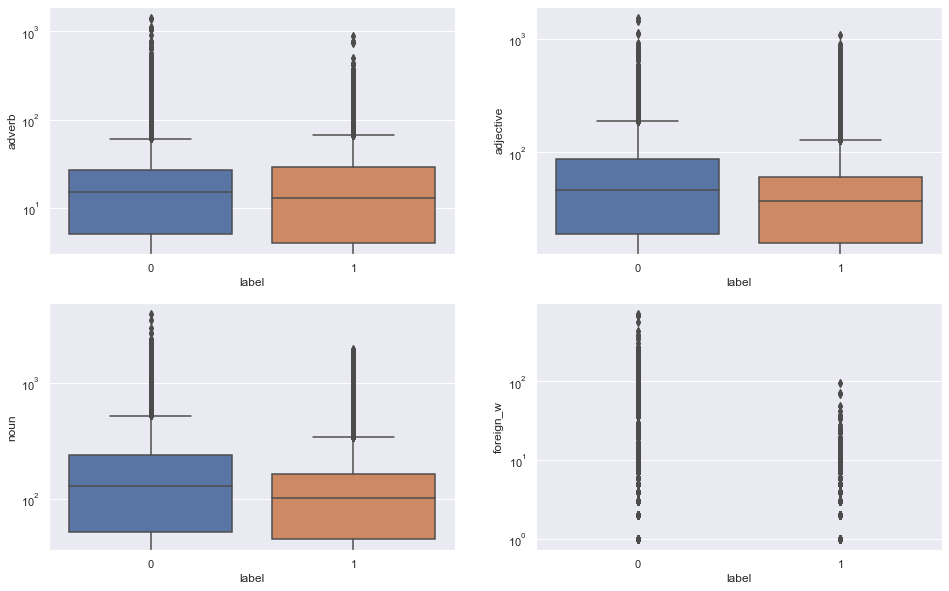

In [56]:
fig, axs  =  plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(16)

axs[0,0].set_yscale("log")
sn.boxplot(x = 'label', y = 'adverb', data = df, ax = axs[0,0])

axs[0,1].set_yscale("log")
sn.boxplot(x = 'label', y = 'adjective', data = df, ax = axs[0,1])

axs[1,0].set_yscale("log")
sn.boxplot(x = 'label', y = 'noun', data = df, ax = axs[1,0])

axs[1,1].set_yscale("log")
sn.boxplot(x = 'label', y = 'foreign_w', data = df, ax = axs[1,1])

## Inference
It can be observed that the occurrence of group N (Nouns), IN (Preposition), R (Adverb) and J (Adjectives) in favor of fake news. Reason lies behind is that the fake news creators in usual directly attack on people, group or community which involves use of more noun and adjective 

<AxesSubplot:xlabel='label', ylabel='verb'>

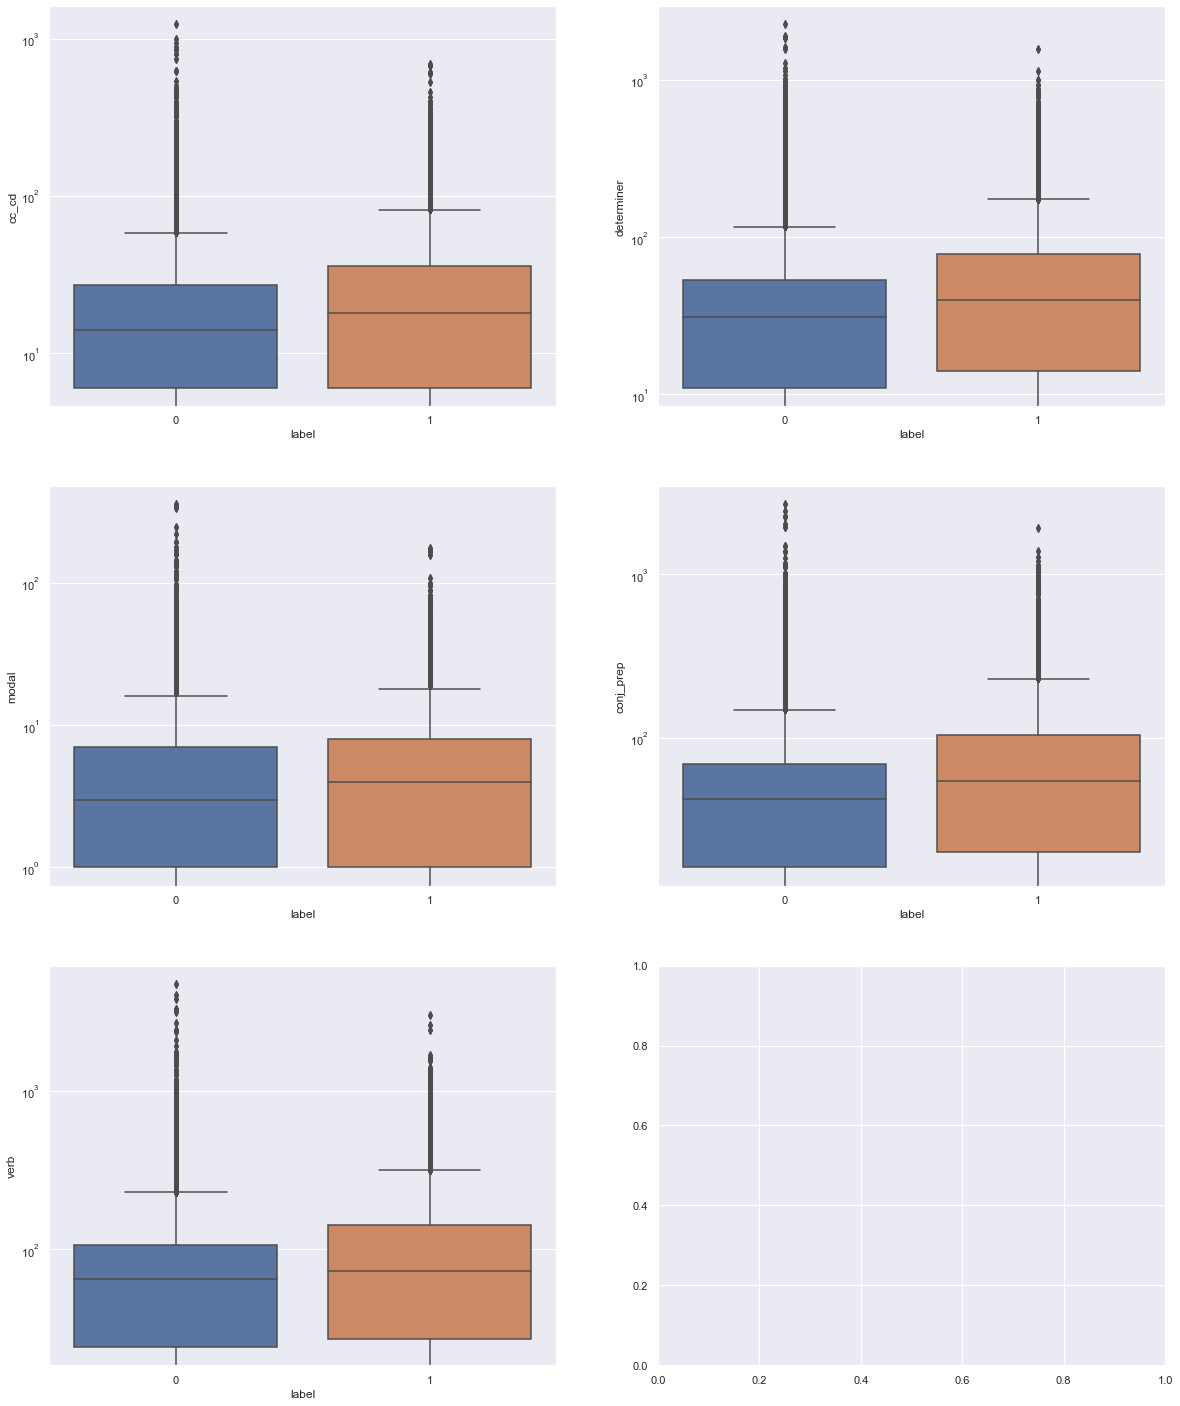

In [57]:
fig, axs  =  plt.subplots(3,2)
fig.set_figheight(25)
fig.set_figwidth(20)

axs[0,0].set_yscale("log")
sn.boxplot(x = 'label', y = 'cc_cd', data = df, ax = axs[0,0])

axs[0,1].set_yscale("log")
sn.boxplot(x = 'label', y = 'determiner', data = df, ax = axs[0,1])

axs[1,0].set_yscale("log")
sn.boxplot(x = 'label', y = 'modal', data = df, ax = axs[1,0])

axs[1,1].set_yscale("log")
sn.boxplot(x = 'label', y = 'conj_prep', data = df , ax = axs[1,1])

axs[2,0].set_yscale('log')
sn.boxplot(x = 'label', y = 'verb', data = df, ax = axs[2,0])


### Inference:
whereas groups CC (Coordinating Conjunction), CD (Cardinal Number), I (Prepositions), M (modal) and V (Verbs) in favor of real news. However, in all the cases we can see fake news contains large number of outliers.

## Lexical Diversity

<AxesSubplot:xlabel='label', ylabel='num_unique_words'>

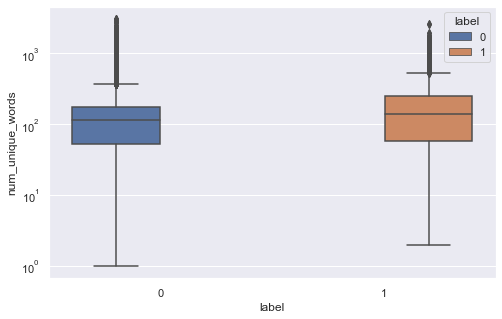

In [58]:
fig, axs = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(8)

axs.set_yscale("log")
sn.boxplot(x = 'label', y = 'num_unique_words', hue = 'label', data = df, ax = axs)

In [59]:
df[df['label']==0]['num_unique_words'].describe(), df[df['label']==1]['num_unique_words'].describe()

(count    48628.000000
 mean       146.697890
 std        164.685581
 min          1.000000
 25%         53.000000
 50%        116.000000
 75%        178.000000
 max       3075.000000
 Name: num_unique_words, dtype: float64,
 count    47889.000000
 mean       172.881372
 std        151.960181
 min          2.000000
 25%         58.000000
 50%        141.000000
 75%        249.000000
 max       2609.000000
 Name: num_unique_words, dtype: float64)

### Inference:
The rich news has more diversity. In the below boxplot we can see real news contains primarily a greater number of unique words compared to fake news. However, this will not create any significant  difference.

## Sentiment

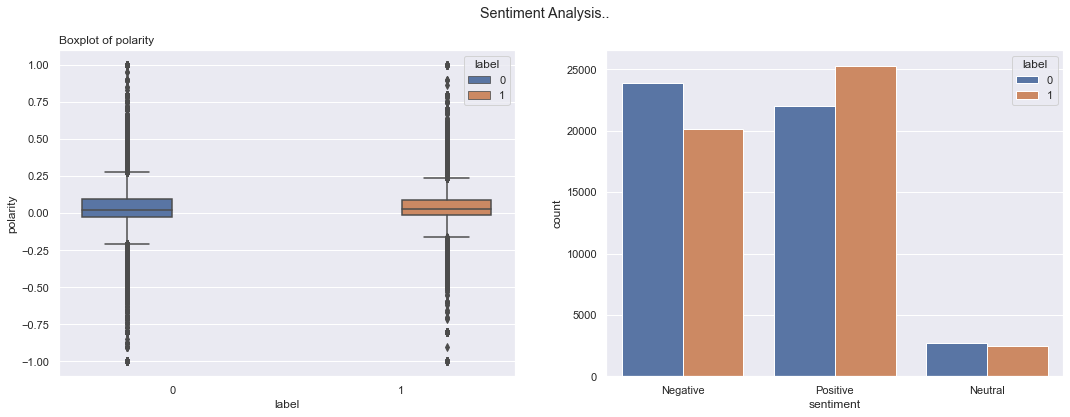

In [60]:
plt.figure(figsize=(18,6))
plt.suptitle('Sentiment Analysis..')
plt.subplot(121)
plt.title('Boxplot of polarity', loc = 'left')
sn.boxplot(y = 'polarity', x = 'label', data = df, hue = 'label')

plt.subplot(122)
sn.countplot(data = df, x = 'sentiment', hue = 'label')
plt.show()

In [61]:
df[df['label']==0]['polarity'].describe(), df[df['label']==1]['polarity'].describe()

(count    48628.000000
 mean         0.031884
 std          0.153861
 min         -1.000000
 25%         -0.025000
 50%          0.021363
 75%          0.096429
 max          1.000000
 Name: polarity, dtype: float64,
 count    47889.000000
 mean         0.034339
 std          0.117889
 min         -1.000000
 25%         -0.013426
 50%          0.026809
 75%          0.086754
 max          1.000000
 Name: polarity, dtype: float64)

### Inference
From the above boxplot we can see that the polarity of data is almost same. Even though polarity of data is equally distributed we can observe significant difference in the sentiment of the articles. From the above countplot we can understand that real news contains more of positive article whereas fake news contains more of negative sentiment sentences.

Polarity of both fake and real news articles are almost same (zero centric). 

## Multi-Variate Analysis

### Correlation plot

<AxesSubplot:>

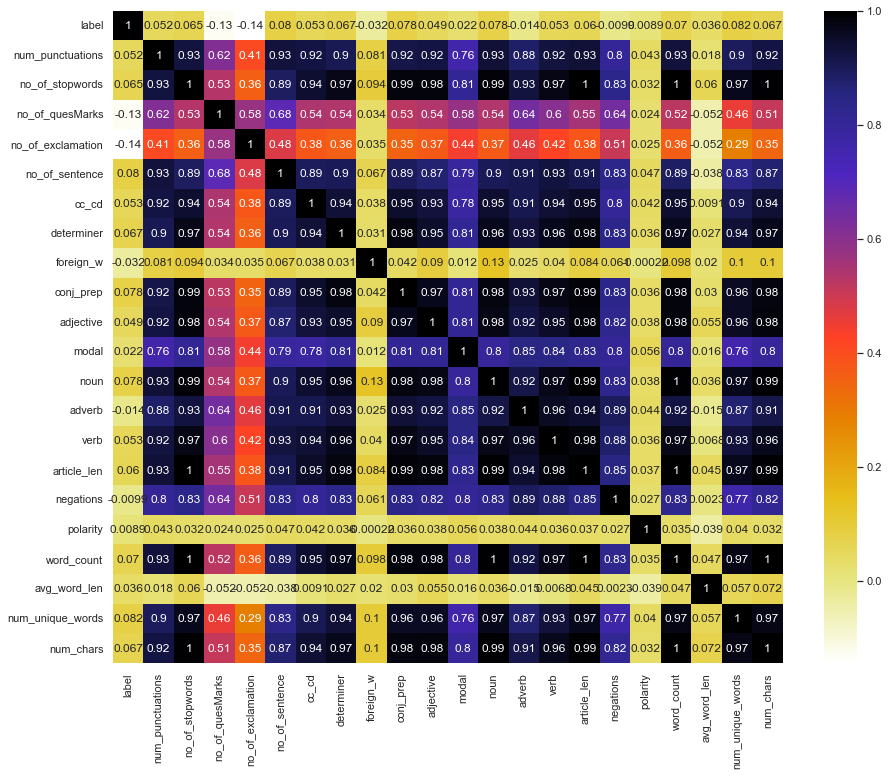

In [62]:
tc = df.corr()
plt.figure(figsize = (15,12))
sn.heatmap(tc, annot=True, cmap=plt.cm.CMRmap_r)

In [63]:
def correlation_feature_selection(df, threshold):
    features = set() # Set for all highly correlated features
    corr_mat = df.corr() # Creating correlation matrix
    for i in range(len(corr_mat.columns)): # Iterating over the columns
        for j in range(i):
            if corr_mat.iloc[i,j] > threshold: # We are interested only in high positive correlation
                features.add(corr_mat.columns[i]) # Adding highly correlated features into a set
    return features

In [64]:
corr_features = correlation_feature_selection(df, 0.85)
corr_features

{'adjective',
 'adverb',
 'article_len',
 'cc_cd',
 'conj_prep',
 'determiner',
 'negations',
 'no_of_sentence',
 'no_of_stopwords',
 'noun',
 'num_chars',
 'num_unique_words',
 'verb',
 'word_count'}

## Inference:
In the above correlation heatmap we can clearly see there are number of columns which are highly corelated. According to above analysis, features 'adjective', 'adverb', 'article_len', 'cc_cd', 'conj_prep', 'determiner', 'negations', 'no_of_sentence', 'no_of_stopwords', 'noun', 'num_chars', 'num_unique_words', 'verb' and 'word_count' are highly correlated. It is not advisable to use highly correlated features in model building. 

### Pair plot

In [65]:
df_new = df.drop(list(corr_features), axis = 1)
df_new.head()

label                                    cleaned_article  num_punctuations  \
0      0  obama homosexual duerte despises obama want pr...                12   
1      1  palestinian christian muslim unite trump jerus...                92   
2      1  caribbean face hard road recovery irma ravage ...               142   
3      0  trump demanded york time apologize exposing tr...               188   
4      1  bomb kill syria homs city state medium beirut ...                55   

   no_of_quesMarks  no_of_exclamation sentiment  foreign_w  modal  polarity  \
0                1                  0  Negative          0      0 -0.152857   
1                0                  0  Positive          0      4  0.027711   
2                0                  0  Negative          7      5 -0.020409   
3                5                  9  Negative          0      8 -0.034119   
4                0                  0  Negative          0      3  0.006198   

   avg_word_len  
0      6.344828  
1      6.938356  
2      6.556225  
3      7.200758  
4      6.484848

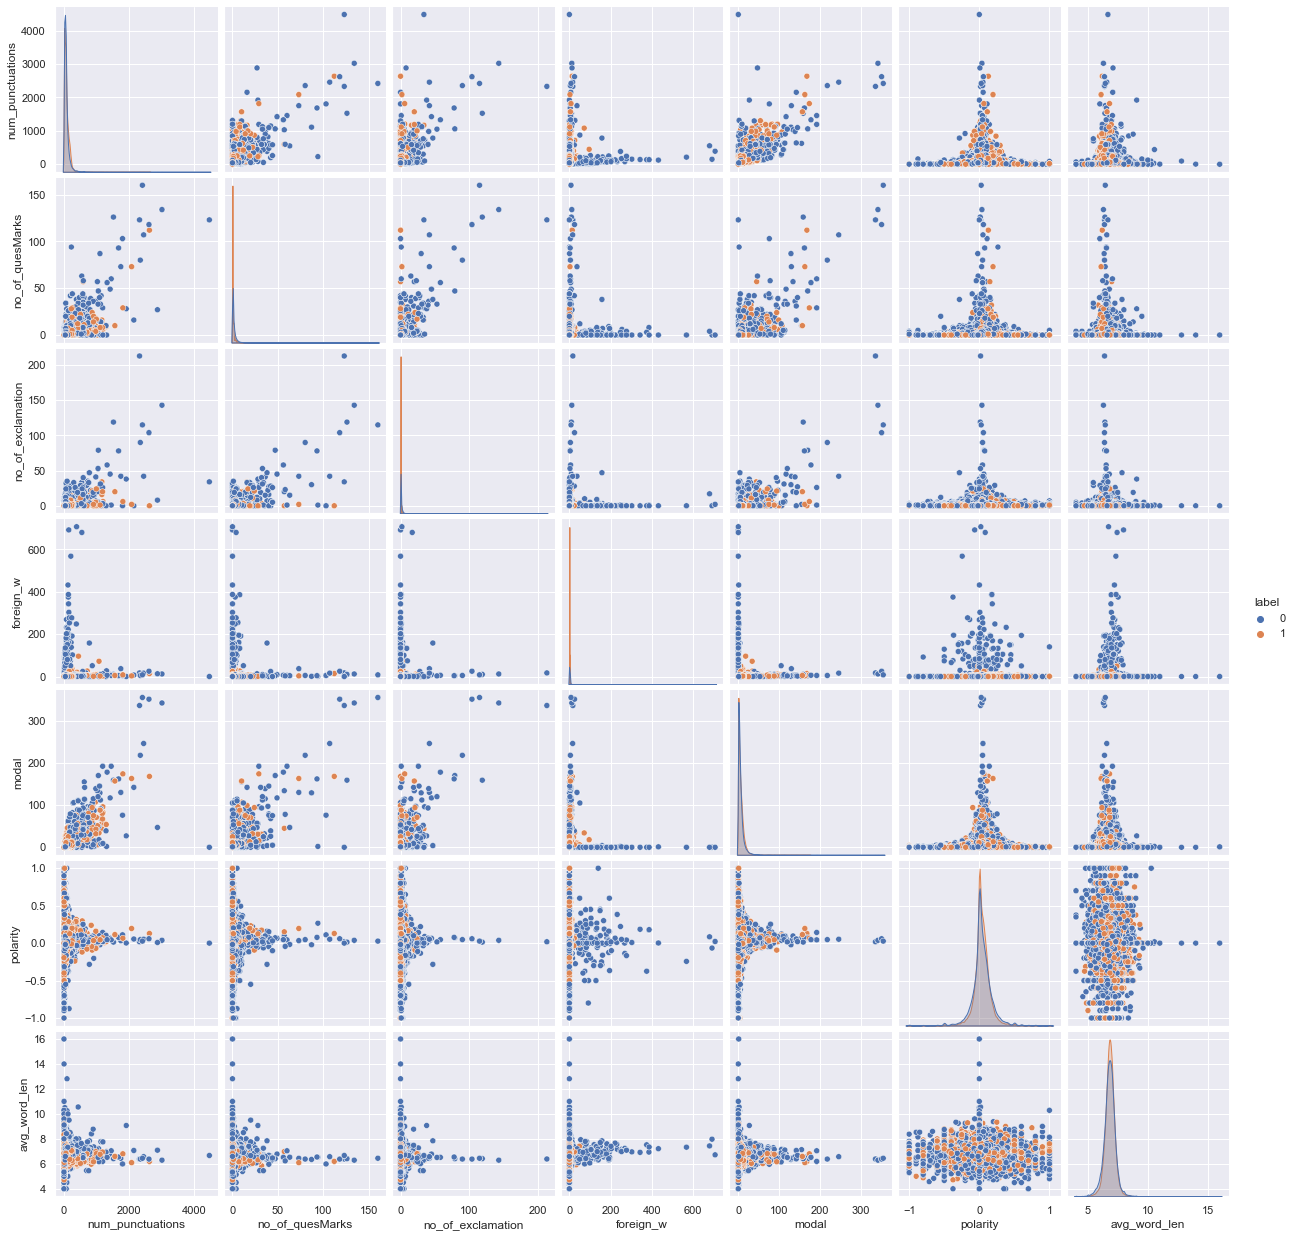

In [66]:
sn.pairplot(data=df_new[['label', 'num_punctuations', 'no_of_quesMarks', 'no_of_exclamation', 'foreign_w', 'modal', 'polarity', 'avg_word_len']], 
            hue="label",
            diag_kind = 'kde',
            dropna='true')

### Inference:
Looking at the above plot we see lots of classified points between few features which can be useful for creating a good model for classification. Plots forming with features foreign_w, polarity and avg_word_len seems to be more useful for classifying fake and real news. 

bahot dur nahi hai manzil per pehla kadam aasan nahi
chalte he nahi rahoge zindagi bhar to zndai me aaram nahi
ishq me thokar ya dosti be fareb mile to shukriyada krna dost
gamm her din ka khel hai, gam me bhi maja krna hai dost

to kispe gussa karu kunsi dua karu mai,
agar vo milne nahi aa rha to kya karu mai,
jise mai roj duao me maga krta tha,
ab uske hak me bhala kaise baddua karu mai

## WordCloud

In [68]:
fake = ' '.join(np.array(df[df['label'] == 0]['cleaned_article']).flatten())
true = ' '.join(np.array(df[df['label'] == 1]['cleaned_article']).flatten())

In [69]:
from nltk.corpus import stopwords
stop_words = stopwords.words('English')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

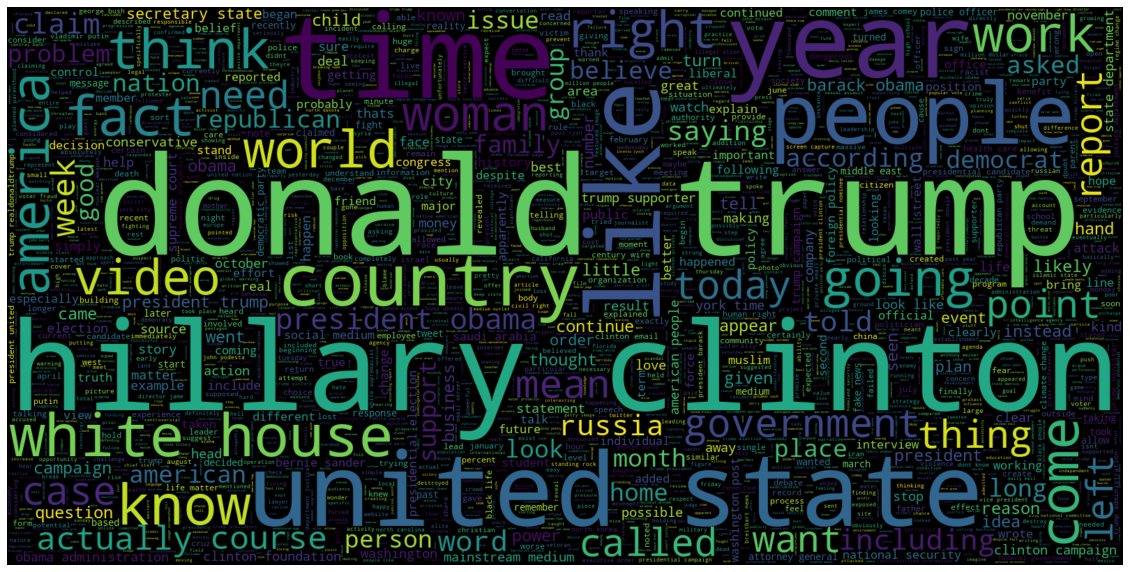

In [70]:
# Word Cloud of Fake News

from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = len(fake), width=1600,height=800, stopwords=stop_words).generate(fake)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

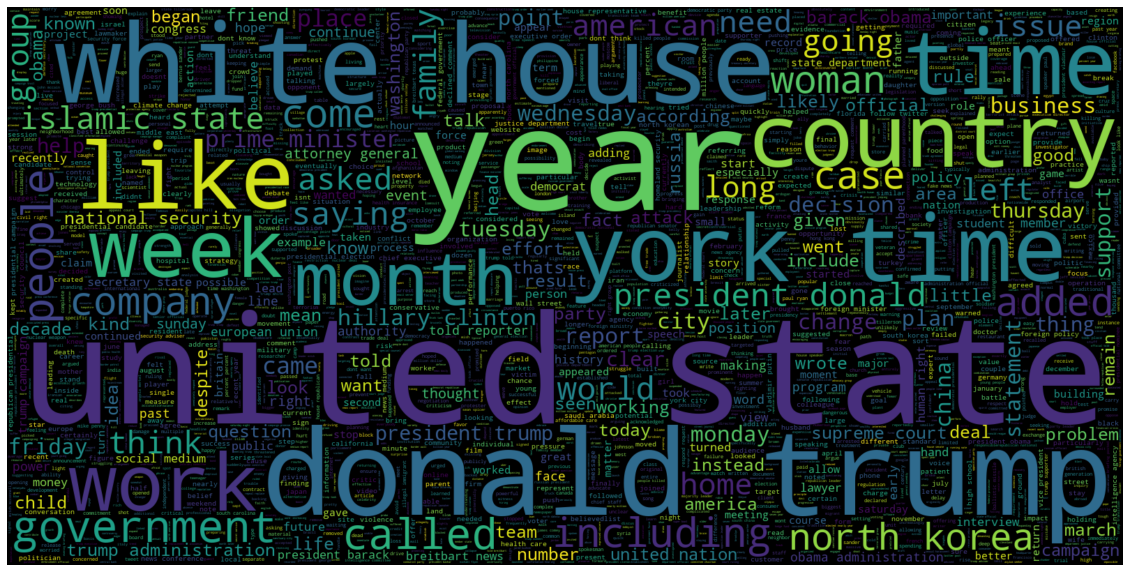

In [71]:
# Word Cloud of Real News


plt.figure(figsize=(20,20))
wc = WordCloud(max_words = len(true), width=1600,height=800, stopwords=stop_words).generate(true)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [72]:
from nltk.tokenize import word_tokenize
maxlen = -1
for doc in df['cleaned_article']:
    token = word_tokenize(doc)
    if(maxlen<len(token)):
        maxlen = len(token)
        
print("Max number of word in a doc : ", maxlen)

Max number of word in a doc :  9076


In [ ]:
import plotly.io as pio
pio.renderers.default='notebook'

## Unigram

In [5]:
# Function of n_gram analysis

def get_text_ngrams(corpus, count, x):
    vector = CountVectorizer(ngram_range = (x,x)).fit(corpus)
    bow = vector.transform(corpus)
    sum_of_words = bow.sum(axis=0) 
    words_frequency = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
    return words_frequency[:count]

In [6]:
#Unigram analysis
plt.figure(figsize = (12,8))
freq_bigram = get_text_ngrams(df["cleaned_article"], 15, 1)
df_bigram = pd.DataFrame(freq_bigram, columns = ['Unigram', 'Frequency'])
df_bigram = df_bigram.set_index('Unigram')
df_bigram.iplot(kind = 'bar', xTitle = 'Unigram', yTitle = 'Count', title = 'Top 15 Unigram words')

<Figure size 864x576 with 0 Axes>

## Bigram

In [75]:
# Bigram Analysis
plt.figure(figsize = (15,8))
freq_bigram = get_text_ngrams(df["cleaned_article"], 15, 2)
df_bigram = pd.DataFrame(freq_bigram, columns = ['Bigram', 'Frequency'])
df_bigram = df_bigram.set_index('Bigram')
df_bigram.iplot(kind = 'bar', xTitle = 'Bigram', yTitle = 'Count', title = 'Top 15 Bigram words')

<Figure size 1080x576 with 0 Axes>

## Trigram

In [76]:
# Trigram Analysis
plt.figure(figsize = (15,8))
freq_trigram = get_text_ngrams(df["cleaned_article"], 15, 3)
df_trigram = pd.DataFrame(freq_trigram, columns = ['Trigram', 'Frequency'])
df_trigram = df_trigram.set_index('Trigram')
df_trigram.iplot(kind = 'bar', xTitle = 'Trigram', yTitle = 'Count', title = 'Top 15 Trigram words')

<Figure size 1080x576 with 0 Axes>

## TSNE Visualization

In [77]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in df["cleaned_article"].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

In [78]:
def tsne_features(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=3, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    return new_values, labels

In [79]:
corpus = build_corpus(df)  
# Converting text word into vector form
model = word2vec.Word2Vec(corpus, vector_size=100, window=20, min_count=500, workers=4)
new_values, labels = tsne_features(model)

In [80]:
tsne_df = pd.DataFrame(new_values, columns = ['X', 'Y', 'Z'])
tsne_df['labels'] = labels
sample = tsne_df.sample(n = 500)
x = sample['X'].to_numpy()
y = sample['Y'].to_numpy()
z = sample['Z'].to_numpy()

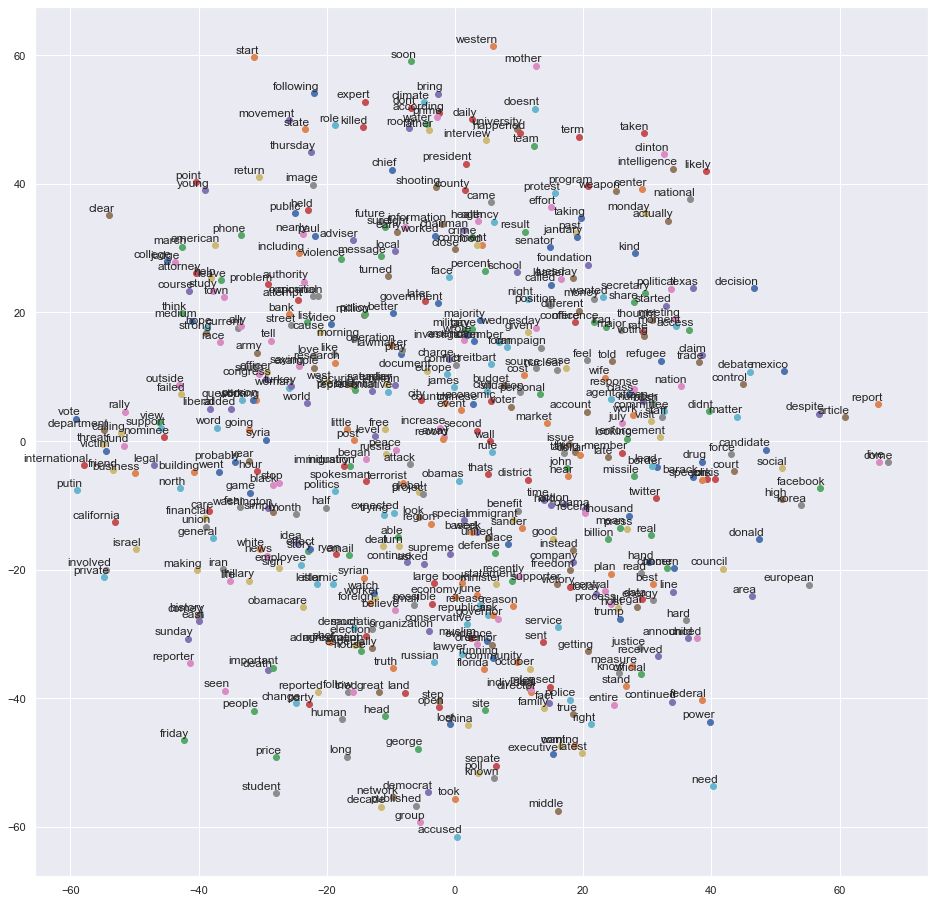

In [81]:
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

In [82]:
fig = px.scatter_3d(tsne_df[:2000], x = 'X', y = 'Y', z = 'Z', text='labels')
fig.show()